# Project 3: Predicting Hurricane Damage
### Jackson Thetford and Mihiro Suzuki

## Data preprocessing and visualization

Getting details about the images:

In [1]:
from PIL import Image
import tensorflow as tf
image = Image.open('./data/damage/-93.795_30.03779.jpeg')
print("Image Format: ", image.format)
print("Image Mode: ", image.mode)
print("Image Size: ", image.size)


Image Format:  JPEG
Image Mode:  RGB
Image Size:  (128, 128)


Seeing what the images look like:

datatype:  uint8
shape:  (128, 128, 3)


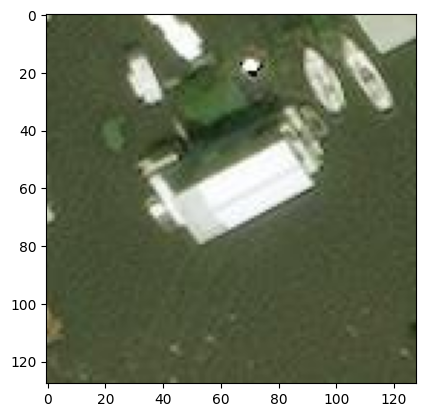

In [2]:
from matplotlib import image
from matplotlib import pyplot

data = image.imread('./data/damage/-93.795_30.03779.jpeg')

print("datatype: ", data.dtype)
print("shape: ", data.shape)

pyplot.imshow(data)
pyplot.show()


Getting the images and labesl in python data types, validating

In [3]:
import numpy as np
import os

# function to get images and labels from folders 

def load_images_from_folder(folder):
    data = []
    labels = []  # 0 for 'no-damage', 1 for 'damage'
    for subfolder in ['no_damage', 'damage']:
        label = 0 if subfolder == 'no_damage' else 1
        path = os.path.join(folder, subfolder)
        for filename in os.listdir(path):
            img_path = os.path.join(path, filename)
            try:
                img = Image.open(img_path) 
                img_array = np.array(img)
                data.append(img_array)
                labels.append(label)
            except Exception as e:
                print(e)
    return np.array(data), np.array(labels)


In [4]:
folder = "./data"
data_all, labels_all = load_images_from_folder(folder) ## These hold all the images and labels

In [5]:
import pandas as pd
labels_pd = pd.DataFrame(labels_all, dtype=bool) # converting to a df bc i like the info function
labels_pd.info()
labels_pd.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21322 entries, 0 to 21321
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       21322 non-null  bool 
dtypes: bool(1)
memory usage: 21.0 KB


,0
count,21322
unique,2
top,True
freq,14170


In [6]:
print("labels: ", labels_all) # 0 means no damage

labels:  [0 0 0 ... 1 1 1]


In [7]:
print("Number of images: ", data_all.shape[0] )
print("Size of images: ", data_all[0].shape)

Number of images:  21322
Size of images:  (128, 128, 3)


Normalizing data:

In [8]:
def normalize(image_array):
    data_all_resized = []
    for image in data_all:
        image_resized = np.array(image, dtype=np.float32) / 255.0
        img_array = np.array(image_resized)
        data_all_resized.append(img_array)
        
    return np.array(data_all_resized)

In [9]:
data_all_resized = normalize(data_all)

validating all images are the same shape. They are so no need to be rescaled:

In [10]:
# This line finds all the images that are not 128x128 RGB pixels. There are non, all images are same size
data_all_resized[data_all_resized[1].shape != (128, 128, 3)]

array([], shape=(0, 21322, 128, 128, 3), dtype=float32)

Splitting data into testing and training sets

In [11]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

X = data_all_resized
y = labels_all
y_cat = to_categorical(y, 2)

print(y_cat) # the first number in the array corresponds to damage ...  [damage, no-damage]
X_train, X_test, y_train, y_test = train_test_split(X, y_cat, test_size=0.25, stratify=y, random_state=1)

[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [12]:
# sanity check
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(15991, 128, 128, 3)
(15991, 2)
(5331, 128, 128, 3)
(5331, 2)


### At this point we have:
- loaded the data, visualized it, checked for characteristics such as image size, format, etc.
- put the data into python data types (np.arrays) as the variables data_all and labels_all, which holds all the data.
- Normalized the data
    - didnt need to rescale because all images are the same size
- Split the data into testing and training sets

## Model design, training and evaluation

### ANN

In [13]:
# Flattening the image, 128 px * 128 px * 3 colors (RGB)
image_vector_size = X_train.shape[1] * X_train.shape[2] * X_train.shape[3]
X_train_flattened = X_train.reshape(X_train.shape[0], image_vector_size)
X_test_flattened = X_test.reshape(X_test.shape[0], image_vector_size)

In [14]:
# From class notes:
from tensorflow.keras.callbacks import LambdaCallback
 # Define a callback function to print weights and biases at the end of each epoch
def print_weights_and_biases(epoch, logs):
    if epoch % 1 == 0:  # Print every epoch
        print(f"\nWeights and Biases at the end of Epoch {epoch}:")
        for layer in model.layers:
            print(f"Layer: {layer.name}")
            weights, biases = layer.get_weights()
            print(f"Weights:\n{weights}")
            print(f"Biases:\n{biases}")

# Create a LambdaCallback to call the print_weights_and_biases function
print_weights_callback = LambdaCallback(on_epoch_end=print_weights_and_biases)

Creating Model

In [15]:
# Importing libraries needed for creating neural network,
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

# image_vector_size = 128*128*3

Ann_1 = Sequential() # initialize model

# model.add(Dense(image_vector_size, activation='relu', input_shape=(image_vector_size,)))
# models first layer, (128*128*3) perceptrons, relu activation function, input is 1D array of size ((128*128*3), 1)

# Ann_1.add(Dense(2048, activation='relu', input_shape=(image_vector_size,)))

Ann_1.add(Dense(1028, activation='relu', input_shape=(image_vector_size,)))
# models first layer, 1028 perceptrons, relu activation function, input is 1D array of size ((128*128*3), 1)

Ann_1.add(Dense(512, activation='relu'))

Ann_1.add(Dense(256, activation='relu'))

Ann_1.add(Dense(128, activation='relu'))

Ann_1.add(Dense(512, activation='relu'))

Ann_1.add(Dense(256, activation='relu'))

Ann_1.add(Dense(128, activation='relu'))

Ann_1.add(Dense(64, activation='relu'))

Ann_1.add(Dense(256, activation='relu'))

Ann_1.add(Dense(128, activation='relu'))

Ann_1.add(Dense(32, activation='relu'))

Ann_1.add(Dense(2, activation='softmax'))
# final layer, 2 perceptrons bc 2 outputs


/opt/homebrew/lib/python3.11/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
Ann_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1028)           │    50,529,284 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       526,848 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 512)            │        66,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 256)            │        16,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 2)              │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 51,512,614 (196.51 MB)

 Trainable params: 51,512,614 (196.51 MB)

 Non-trainable params: 0 (0.00 B)

Compiling and training model

- make note we are using the "binary_crossentropy" loss function

In [17]:
Ann_1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
Ann_1.fit(X_train_flattened, y_train, validation_split=0.2, epochs=20, batch_size=128, verbose=2)

Epoch 1/20


KeyboardInterrupt: 

- Note: the accuracy leveled out, maybe i have too many epochs? The validation accuracy is still pretty close though, and the loss is getting smaller so I think its fine

In [ ]:
test_loss, test_accuracy = Ann_1.evaluate(X_test_flattened, y_test, verbose=0)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

Test Loss: 0.49830591678619385
Test Accuracy: 0.7734008431434631


test accuracy fairly close to training accuracy, thats good ... probably not overfitting

In [ ]:
y_pred = Ann_1.predict(X_test_flattened)

import numpy as np
y_pred_final=[]
for i in y_pred:
    y_pred_final.append(np.argmax(i))

167/167 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step


In [ ]:
y_pred_rounded = np.round(y_pred)
print("Num. of test data points incorrect: ", ((y_pred_rounded == y_test) == [False, False]).sum()/2)
print("Num. of test data points correct: ", ((y_pred_rounded == y_test) == [True, True]).sum()/2)
print("Total number of testing images: ", len(X_test_flattened))

Num. of test data points incorrect:  1208.0
Num. of test data points correct:  4123.0
Total number of testing images:  5331


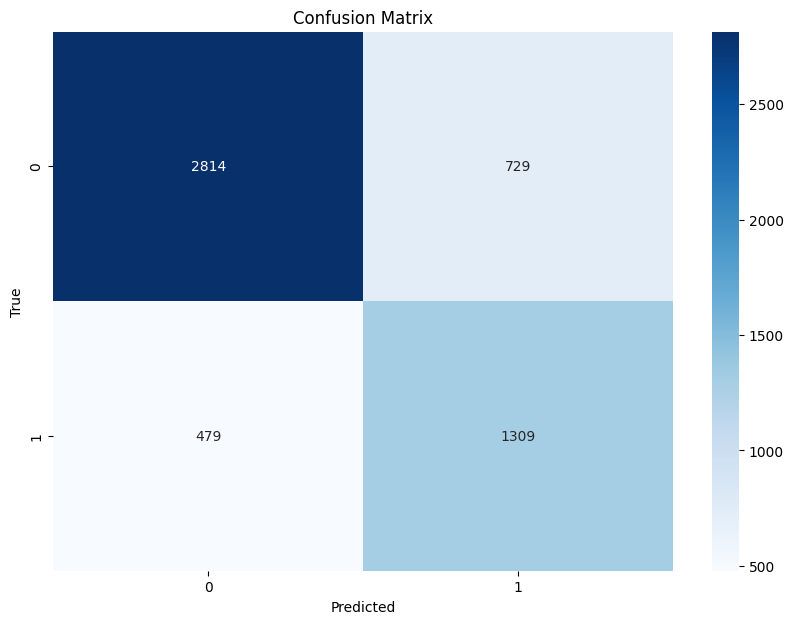

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the confusion matrix
cm = confusion_matrix(y_test[:,0], y_pred_rounded[:,0])

# Visualize the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# [damage, no-damage]


`[damage, no-damage]`
^ catagory 0 means damage ... we see that percentage wise, there are more false negatives than false possitive.  

## Lenet-5 CNN Architecture

In [ ]:
from tensorflow.keras.layers import Flatten, Conv2D, AveragePooling2D
from tensorflow.keras.optimizers import Adam

lenet5 = Sequential()

input_shape = (128, 128, 3)

# Layer 1: Convolutional layer with 6 filters of size 5x5, followed by average pooling
lenet5.add(Conv2D(6, kernel_size=(5, 5), activation='relu', input_shape=input_shape))
lenet5.add(AveragePooling2D(pool_size=(2, 2)))

# Layer 2: Convolutional layer with 16 filters of size 5x5, followed by average pooling
lenet5.add(Conv2D(16, kernel_size=(5, 5), activation='relu'))
lenet5.add(AveragePooling2D(pool_size=(2, 2)))

# Flatten the feature maps to feed into fully connected layers
lenet5.add(Flatten())

# Layer 3: Fully connected layer with 120 neurons
lenet5.add(Dense(120, activation='relu'))

# Layer 4: Fully connected layer with 84 neurons
lenet5.add(Dense(84, activation='relu'))

# Output layer: Fully connected layer with num_classes neurons (e.g., 10 for MNIST)
lenet5.add(Dense(2, activation='softmax'))

/opt/homebrew/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [ ]:
lenet5.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 124, 124, 6)    │           456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d               │ (None, 62, 62, 6)      │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 58, 58, 16)     │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_1             │ (None, 29, 29, 16)     │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 13456)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 120)            │     1,614,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 84)             │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 2)              │           170 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,628,046 (6.21 MB)

 Trainable params: 1,628,046 (6.21 MB)

 Non-trainable params: 0 (0.00 B)

Using 8 epochs because this method seems to converge fairly quickly, want to keep accuracy and val_accuracy close

In [ ]:
lenet5.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
lenet5.fit(X_train, y_train, validation_split=0.3, epochs=10, batch_size=128, verbose=2)

Epoch 1/20


KeyboardInterrupt: 

The accuracy is concerningly better than the validation accuracy but I dont think its too bad.

In [ ]:
test_loss, test_accuracy = lenet5.evaluate(X_test, y_test, verbose=0)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

Test Loss: 0.49830591678619385
Test Accuracy: 0.7734008431434631


In [ ]:
y_pred = lenet5.predict(X_test_flattened)

import numpy as np
y_pred_final=[]
for i in y_pred:
    y_pred_final.append(np.argmax(i))

y_pred_rounded = np.round(y_pred)    

In [ ]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test[:,0], y_pred_rounded[:,0])

# Visualize the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# [damage, no-damage]
